In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv')

Benign 357
Malignanat 212


C:\Users\gauta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


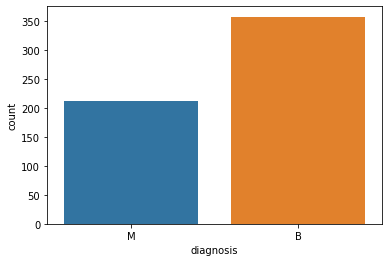

In [3]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [4]:
# Importing data
del data['Unnamed: 32']

In [5]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [7]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
#adding the input and first hidden layer
classifier = Sequential()
#adding the 1st hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
#adding the 2nd hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
#adding the 3rd hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
#adding the 4th hidden layer
classifier.add(Dense(1,activation='sigmoid'))

In [10]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 1s 2ms/step - loss: 0.7920 - accuracy: 0.3626
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7758 - accuracy: 0.3626
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7603 - accuracy: 0.3626
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7464 - accuracy: 0.3626
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.7328 - accuracy: 0.3626
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.3626
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.3626
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.3626
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.7055
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6374
Epoch 11/150
5/5 [===========

In [12]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 1ms/step


In [14]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

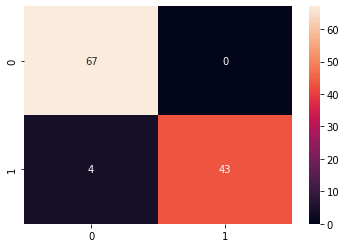

In [15]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
